<a href="https://colab.research.google.com/github/akshayask/Student-Academic-Performance-Prediction/blob/main/decisiontree_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings('ignore')

# Import dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving training.csv to training.csv


In [ ]:
 df= pd.read_csv("training.csv")

# Exploratory data analysis 

In [ ]:
df.shape

(1044, 51)

In [ ]:
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,GradeG1,GradeG2,FinalGrade_cat,Regularity_cat,school_cat,GradeG1_cat,GradeG2_cat,reason_cat,Mjob_cat,Fjob_cat,guardian_cat,famsize_cat,address_cat,sex_cat
0,0,GP,F,18,U,0,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,maths,Poor,Always regular,Failure,Poor,3,0,0,1,3,0,0,4,1,0,1,0
1,1,GP,F,17,U,0,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,maths,Poor,Always regular,Failure,Failure,3,0,0,1,1,0,0,2,0,0,1,0
2,2,GP,F,15,U,1,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,maths,Poor,Mostly regular,Poor,Poor,3,2,0,3,3,2,0,2,1,1,1,0
3,3,GP,F,15,U,0,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,maths,Good,Always regular,Good,Satisfactory,2,0,0,2,4,1,1,3,1,0,1,0
4,4,GP,F,16,U,0,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,maths,Poor,Always regular,Poor,Poor,3,0,0,3,3,1,2,2,0,0,1,0


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,GradeG1,GradeG2,FinalGrade_cat,Regularity_cat,school_cat,GradeG1_cat,GradeG2_cat,reason_cat,Mjob_cat,Fjob_cat,guardian_cat,famsize_cat,address_cat,sex_cat
0,GP,F,18,U,0,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,maths,Poor,Always regular,Failure,Poor,3,0,0,1,3,0,0,4,1,0,1,0
1,GP,F,17,U,0,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,maths,Poor,Always regular,Failure,Failure,3,0,0,1,1,0,0,2,0,0,1,0
2,GP,F,15,U,1,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,maths,Poor,Mostly regular,Poor,Poor,3,2,0,3,3,2,0,2,1,1,1,0
3,GP,F,15,U,0,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,maths,Good,Always regular,Good,Satisfactory,2,0,0,2,4,1,1,3,1,0,1,0
4,GP,F,16,U,0,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,maths,Poor,Always regular,Poor,Poor,3,0,0,3,3,1,2,2,0,0,1,0


View summary of dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school          1044 non-null   object
 1   sex             1044 non-null   object
 2   age             1044 non-null   int64 
 3   address         1044 non-null   object
 4   famsize         1044 non-null   int64 
 5   Pstatus         1044 non-null   object
 6   Medu            1044 non-null   int64 
 7   Fedu            1044 non-null   int64 
 8   Mjob            1044 non-null   object
 9   Fjob            1044 non-null   object
 10  reason          1044 non-null   object
 11  guardian        1044 non-null   object
 12  traveltime      1044 non-null   int64 
 13  studytime       1044 non-null   int64 
 14  failures        1044 non-null   int64 
 15  schoolsup       1044 non-null   object
 16  famsup          1044 non-null   object
 17  paid            1044 non-null   object
 18  activiti

In [ ]:
df1=df.copy()
df1 = df1.drop(columns=["G3","FinalGrade_cat","Regularity_cat",	"school_cat",	"GradeG1_cat"	,"GradeG2_cat"	,"reason_cat"	,"Mjob_cat"	,"Fjob_cat"	,"guardian_cat"	,"famsize_cat"	,"address_cat", "sex_cat"],axis=1)
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,subject,FinalGrade,Regularity,GradeG1,GradeG2
0,GP,F,18,U,0,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,maths,Poor,Always regular,Failure,Poor
1,GP,F,17,U,0,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,maths,Poor,Always regular,Failure,Failure
2,GP,F,15,U,1,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,maths,Poor,Mostly regular,Poor,Poor
3,GP,F,15,U,0,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,maths,Good,Always regular,Good,Satisfactory
4,GP,F,16,U,0,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,maths,Poor,Always regular,Poor,Poor


Frequency distribution of values in variables

In [ ]:
col_names = ["school","sex",	"age",	"address",	"famsize",	"Pstatus",	"Medu",	"Fedu",	"Mjob",	"Fjob",	"reason",	"guardian",	"traveltime",	"studytime",	"failures",	"schoolsup",	"famsup",	"paid",	"activities",	"nursery",	"higher",	"internet",	"romantic",	"famrel",	"freetime",	"goout",	"Dalc",	"Walc",	"health",	"absences",	"G1",	"G2"	,"subject",	"FinalGrade"	,"Regularity",	"GradeG1"	,"GradeG2"	]


for col in col_names:
    
    print(df1[col].value_counts())   

GP    772
MS    272
Name: school, dtype: int64
F    591
M    453
Name: sex, dtype: int64
16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64
U    759
R    285
Name: address, dtype: int64
0    738
1    306
Name: famsize, dtype: int64
T    923
A    121
Name: Pstatus, dtype: int64
4    306
2    289
3    238
1    202
0      9
Name: Medu, dtype: int64
2    324
1    256
3    231
4    224
0      9
Name: Fedu, dtype: int64
other       399
services    239
at_home     194
teacher     130
health       82
Name: Mjob, dtype: int64
other       584
services    292
teacher      65
at_home      62
health       41
Name: Fjob, dtype: int64
course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64
mother    728
father    243
other      73
Name: guardian, dtype: int64
1    623
2    320
3     77
4     24
Name: traveltime, dtype: int64
2    503
1    317
3    162
4     62
Name: studytime, dtype: int64
0    861
1    12

Explore class variable

In [ ]:
df1['FinalGrade'].value_counts()

Satisfactory    457
Poor            320
Good            169
Failure          63
Excellent        35
Name: FinalGrade, dtype: int64

Missing values in variables

In [ ]:

df1.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
subject       0
FinalGrade    0
Regularity    0
GradeG1       0
GradeG2       0
dtype: int64

# Declare feature vector and target variable

In [ ]:
X = df1.drop(['FinalGrade'], axis=1)

y = df1['FinalGrade']

# Split data into separate training and test set 

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 48)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((835, 36), (209, 36))

# Feature Engineering

In [ ]:
# check data types in X_train

X_train.dtypes

school        object
sex           object
age            int64
address       object
famsize        int64
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
subject       object
Regularity    object
GradeG1       object
GradeG2       object
dtype: object

Encode categorical variables

In [ ]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,subject,Regularity,GradeG1,GradeG2
89,GP,M,16,U,1,A,4,4,teacher,health,reputation,mother,1,2,0,no,yes,no,no,yes,yes,no,no,4,1,3,3,5,5,18,8,6,maths,Mostly regular,Poor,Poor
704,GP,M,18,U,0,T,4,2,health,other,reputation,father,1,2,0,no,yes,no,yes,yes,yes,yes,yes,5,4,5,1,3,5,4,10,12,portugese,Always regular,Poor,Satisfactory
692,GP,M,17,R,0,T,2,2,other,services,other,mother,2,1,0,no,no,no,no,no,no,no,no,5,2,2,1,1,4,0,9,10,portugese,Always regular,Poor,Poor
30,GP,M,15,U,0,T,4,4,health,services,home,mother,1,2,0,no,yes,yes,no,no,yes,yes,no,5,4,2,3,4,5,0,9,11,maths,Always regular,Poor,Satisfactory
317,GP,F,18,U,0,T,4,3,other,other,course,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,4,3,4,1,1,5,9,9,10,maths,Always regular,Poor,Poor


In [ ]:
X_test.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,subject,Regularity,GradeG1,GradeG2
975,MS,M,19,R,0,T,1,1,other,other,home,other,3,1,1,no,yes,no,no,yes,yes,yes,no,4,4,4,3,3,5,4,8,9,portugese,Always regular,Poor,Poor
522,GP,F,19,U,0,T,0,1,at_home,other,course,other,1,2,2,no,yes,no,no,no,no,no,no,3,4,2,1,1,5,0,9,10,portugese,Always regular,Poor,Poor
413,GP,M,17,U,0,T,3,2,services,services,course,mother,1,1,3,no,yes,yes,yes,yes,yes,yes,no,5,5,5,2,4,5,2,8,8,portugese,Always regular,Poor,Poor
905,MS,F,17,R,0,T,2,2,other,other,reputation,mother,2,2,0,no,yes,no,yes,yes,yes,no,no,5,3,2,1,1,1,0,15,17,portugese,Always regular,Good,Good
328,GP,F,17,U,0,T,4,4,teacher,services,course,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,no,5,4,4,1,3,4,7,10,9,maths,Always regular,Poor,Poor


In [ ]:
!pip install category_encoders
import category_encoders as ce

     |████████████████████████████████| 81kB 5.6MB/s 


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   int64 
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [ ]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols = ["school","sex","address","Pstatus","Mjob",	"Fjob",	"reason",	"guardian",	"schoolsup",	"famsup",	"paid",	"activities",	"nursery",	"higher",	"internet",	"romantic","subject","Regularity",	"GradeG1"	,"GradeG2"])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,subject,Regularity,GradeG1,GradeG2
89,1,1,16,1,1,1,4,4,1,1,1,1,1,2,0,1,1,1,1,1,1,1,1,4,1,3,3,5,5,18,8,6,1,1,1,1
704,1,1,18,1,0,2,4,2,2,2,1,2,1,2,0,1,1,1,2,1,1,2,2,5,4,5,1,3,5,4,10,12,2,2,1,2
692,1,1,17,2,0,2,2,2,3,3,2,1,2,1,0,1,2,1,1,2,2,1,1,5,2,2,1,1,4,0,9,10,2,2,1,1
30,1,1,15,1,0,2,4,4,2,3,3,1,1,2,0,1,1,2,1,2,1,2,1,5,4,2,3,4,5,0,9,11,1,2,1,2
317,1,2,18,1,0,2,4,3,3,2,4,1,1,3,0,1,1,2,2,1,1,2,2,4,3,4,1,1,5,9,9,10,1,2,1,1


In [ ]:
X_test.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,subject,Regularity,GradeG1,GradeG2
975,2,1,19,2,0,2,1,1,3,2,3,3,3,1,1,1,1,1,1,1,1,2,1,4,4,4,3,3,5,4,8,9,2,2,1,1
522,1,2,19,1,0,2,0,1,4,2,4,3,1,2,2,1,1,1,1,2,2,1,1,3,4,2,1,1,5,0,9,10,2,2,1,1
413,1,1,17,1,0,2,3,2,5,3,4,1,1,1,3,1,1,2,2,1,1,2,1,5,5,5,2,4,5,2,8,8,2,2,1,1
905,2,2,17,2,0,2,2,2,3,2,1,1,2,2,0,1,1,1,2,1,1,1,1,5,3,2,1,1,1,0,15,17,2,2,3,3
328,1,2,17,1,0,2,4,4,1,3,4,1,1,3,0,1,1,2,2,1,1,2,1,5,4,4,1,3,4,7,10,9,1,2,1,1


In [ ]:
y_train

89             Poor
704    Satisfactory
692            Poor
30     Satisfactory
317            Poor
           ...     
454            Good
966            Poor
944       Excellent
347            Poor
563            Poor
Name: FinalGrade, Length: 835, dtype: object

# Decision Tree Classifier with criterion gini index

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Predict the Test set results with criterion gini index

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

Check accuracy score with criterion gini index

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8373


In [ ]:
X_train.to_csv("X_train dataset")

Compare the train-set and test-set accuracy


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Poor', 'Satisfactory', 'Poor', 'Satisfactory', 'Poor', 'Poor',
       'Satisfactory', 'Satisfactory', 'Poor', 'Poor', 'Poor', 'Good',
       'Poor', 'Poor', 'Good', 'Poor', 'Satisfactory', 'Satisfactory',
       'Excellent', 'Failure', 'Good', 'Good', 'Satisfactory',
       'Satisfactory', 'Poor', 'Poor', 'Satisfactory', 'Poor', 'Poor',
       'Poor', 'Poor', 'Satisfactory', 'Poor', 'Poor', 'Satisfactory',
       'Poor', 'Excellent', 'Satisfactory', 'Poor', 'Satisfactory',
       'Good', 'Poor', 'Poor', 'Satisfactory', 'Poor', 'Poor',
       'Satisfactory', 'Poor', 'Satisfactory', 'Satisfactory', 'Poor',
       'Good', 'Poor', 'Satisfactory', 'Poor', 'Good', 'Good',
       'Satisfactory', 'Poor', 'Poor', 'Satisfactory', 'Satisfactory',
       'Satisfactory', 'Satisfactory', 'Satisfactory', 'Good', 'Good',
       'Satisfactory', 'Poor', 'Poor', 'Poor', 'Satisfactory', 'Poor',
       'Satisfactory', 'Satisfactory', 'Excellent', 'Satisfactory',
       'Satisfactory', 'Poor', 'Poor

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8443


Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8443
Test set score: 0.8373


Visualize decision-trees

[Text(713.8551724137931, 489.24, 'X[31] <= 10.5\ngini = 0.682\nsamples = 835\nvalue = [28, 50, 131, 262, 364]'),
 Text(296.31724137931036, 380.52000000000004, 'X[31] <= 5.5\ngini = 0.467\nsamples = 342\nvalue = [0, 50, 1, 239, 52]'),
 Text(107.75172413793103, 271.8, 'X[29] <= 2.0\ngini = 0.285\nsamples = 29\nvalue = [0, 24, 0, 5, 0]'),
 Text(53.87586206896552, 163.08000000000004, 'gini = 0.0\nsamples = 21\nvalue = [0, 21, 0, 0, 0]'),
 Text(161.62758620689655, 163.08000000000004, 'X[10] <= 3.5\ngini = 0.469\nsamples = 8\nvalue = [0, 3, 0, 5, 0]'),
 Text(107.75172413793103, 54.360000000000014, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0]'),
 Text(215.50344827586207, 54.360000000000014, 'gini = 0.375\nsamples = 4\nvalue = [0, 3, 0, 1, 0]'),
 Text(484.88275862068963, 271.8, 'X[31] <= 9.5\ngini = 0.407\nsamples = 313\nvalue = [0, 26, 1, 234, 52]'),
 Text(377.13103448275865, 163.08000000000004, 'X[29] <= 0.5\ngini = 0.299\nsamples = 209\nvalue = [0, 23, 0, 173, 13]'),
 Text(323.25517241

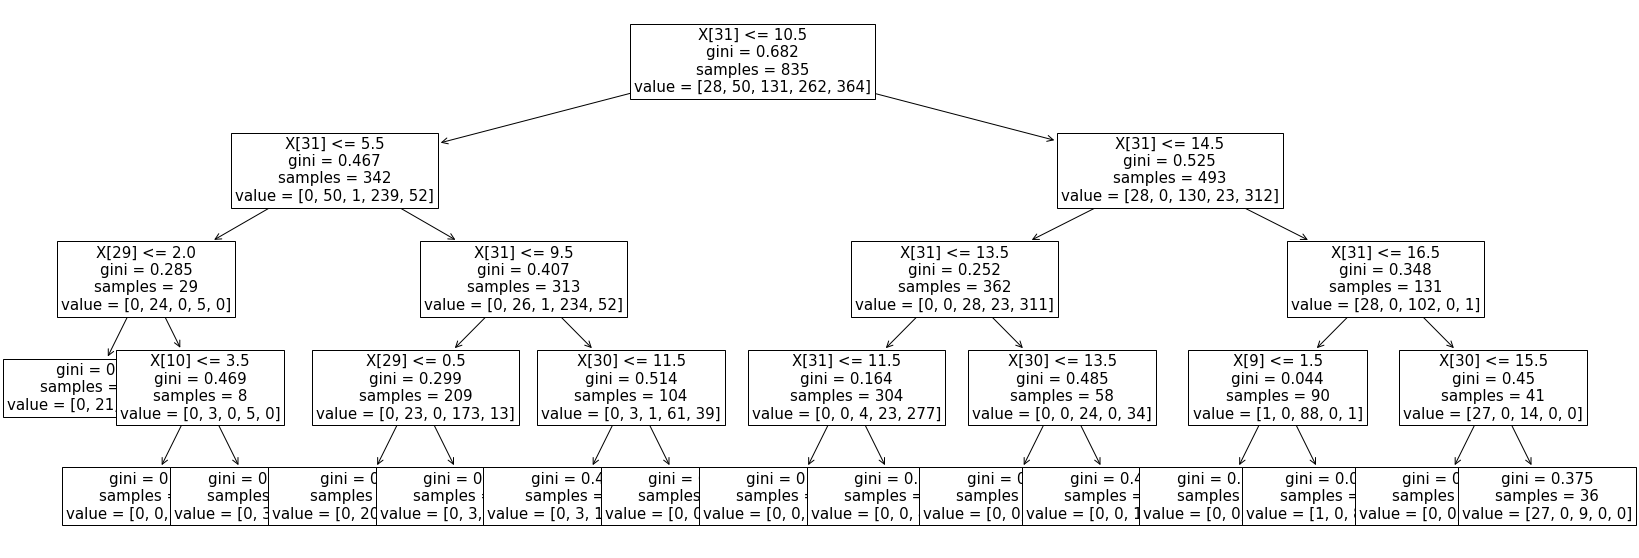

In [ ]:
plt.figure(figsize=(28,10))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train),fontsize=15)

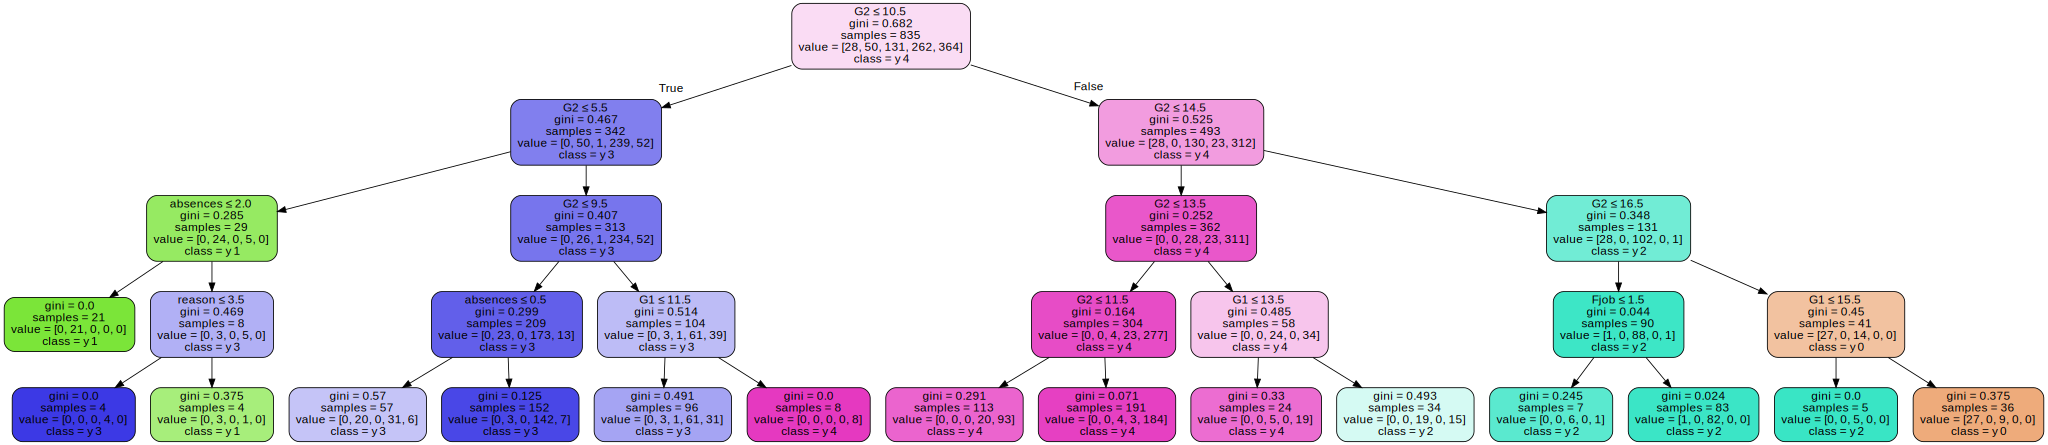

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=True,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

# Decision Tree Classifier with criterion entropy 

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Predict the Test set results with criterion entropy

In [ ]:
y_pred_en = clf_en.predict(X_test)

Check accuracy score with criterion entropy

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8325


Compare the train-set and test-set accuracy

In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['Poor', 'Satisfactory', 'Poor', 'Satisfactory', 'Poor', 'Poor',
       'Satisfactory', 'Satisfactory', 'Poor', 'Poor', 'Poor', 'Good',
       'Poor', 'Poor', 'Good', 'Poor', 'Satisfactory', 'Satisfactory',
       'Excellent', 'Poor', 'Good', 'Good', 'Satisfactory',
       'Satisfactory', 'Poor', 'Poor', 'Satisfactory', 'Poor', 'Poor',
       'Poor', 'Poor', 'Satisfactory', 'Poor', 'Poor', 'Satisfactory',
       'Poor', 'Excellent', 'Satisfactory', 'Poor', 'Satisfactory',
       'Good', 'Poor', 'Poor', 'Satisfactory', 'Poor', 'Poor',
       'Satisfactory', 'Poor', 'Satisfactory', 'Satisfactory', 'Poor',
       'Good', 'Poor', 'Satisfactory', 'Poor', 'Good', 'Good',
       'Satisfactory', 'Poor', 'Poor', 'Satisfactory', 'Satisfactory',
       'Satisfactory', 'Satisfactory', 'Satisfactory', 'Good', 'Good',
       'Satisfactory', 'Poor', 'Poor', 'Poor', 'Satisfactory', 'Poor',
       'Satisfactory', 'Satisfactory', 'Excellent', 'Satisfactory',
       'Satisfactory', 'Poor', 'Poor', 

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8419


Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8419
Test set score: 0.8325


Visualize decision-trees

[Text(968.803448275862, 978.48, 'X[31] <= 10.5\nentropy = 1.874\nsamples = 835\nvalue = [28, 50, 131, 262, 364]'),
 Text(402.1448275862069, 761.0400000000001, 'X[29] <= 0.5\nentropy = 1.205\nsamples = 342\nvalue = [0, 50, 1, 239, 52]'),
 Text(146.2344827586207, 543.6, 'X[31] <= 5.5\nentropy = 1.489\nsamples = 113\nvalue = [0, 44, 1, 53, 15]'),
 Text(73.11724137931034, 326.1600000000001, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21, 0, 0, 0]'),
 Text(219.35172413793103, 326.1600000000001, 'X[31] <= 8.5\nentropy = 1.456\nsamples = 92\nvalue = [0, 23, 1, 53, 15]'),
 Text(146.2344827586207, 108.72000000000003, 'entropy = 1.156\nsamples = 34\nvalue = [0, 15, 0, 18, 1]'),
 Text(292.4689655172414, 108.72000000000003, 'entropy = 1.43\nsamples = 58\nvalue = [0, 8, 1, 35, 14]'),
 Text(658.0551724137931, 543.6, 'X[31] <= 9.5\nentropy = 0.806\nsamples = 229\nvalue = [0, 6, 0, 186, 37]'),
 Text(511.8206896551724, 326.1600000000001, 'X[31] <= 7.5\nentropy = 0.487\nsamples = 160\nvalue = [0, 6, 0, 14

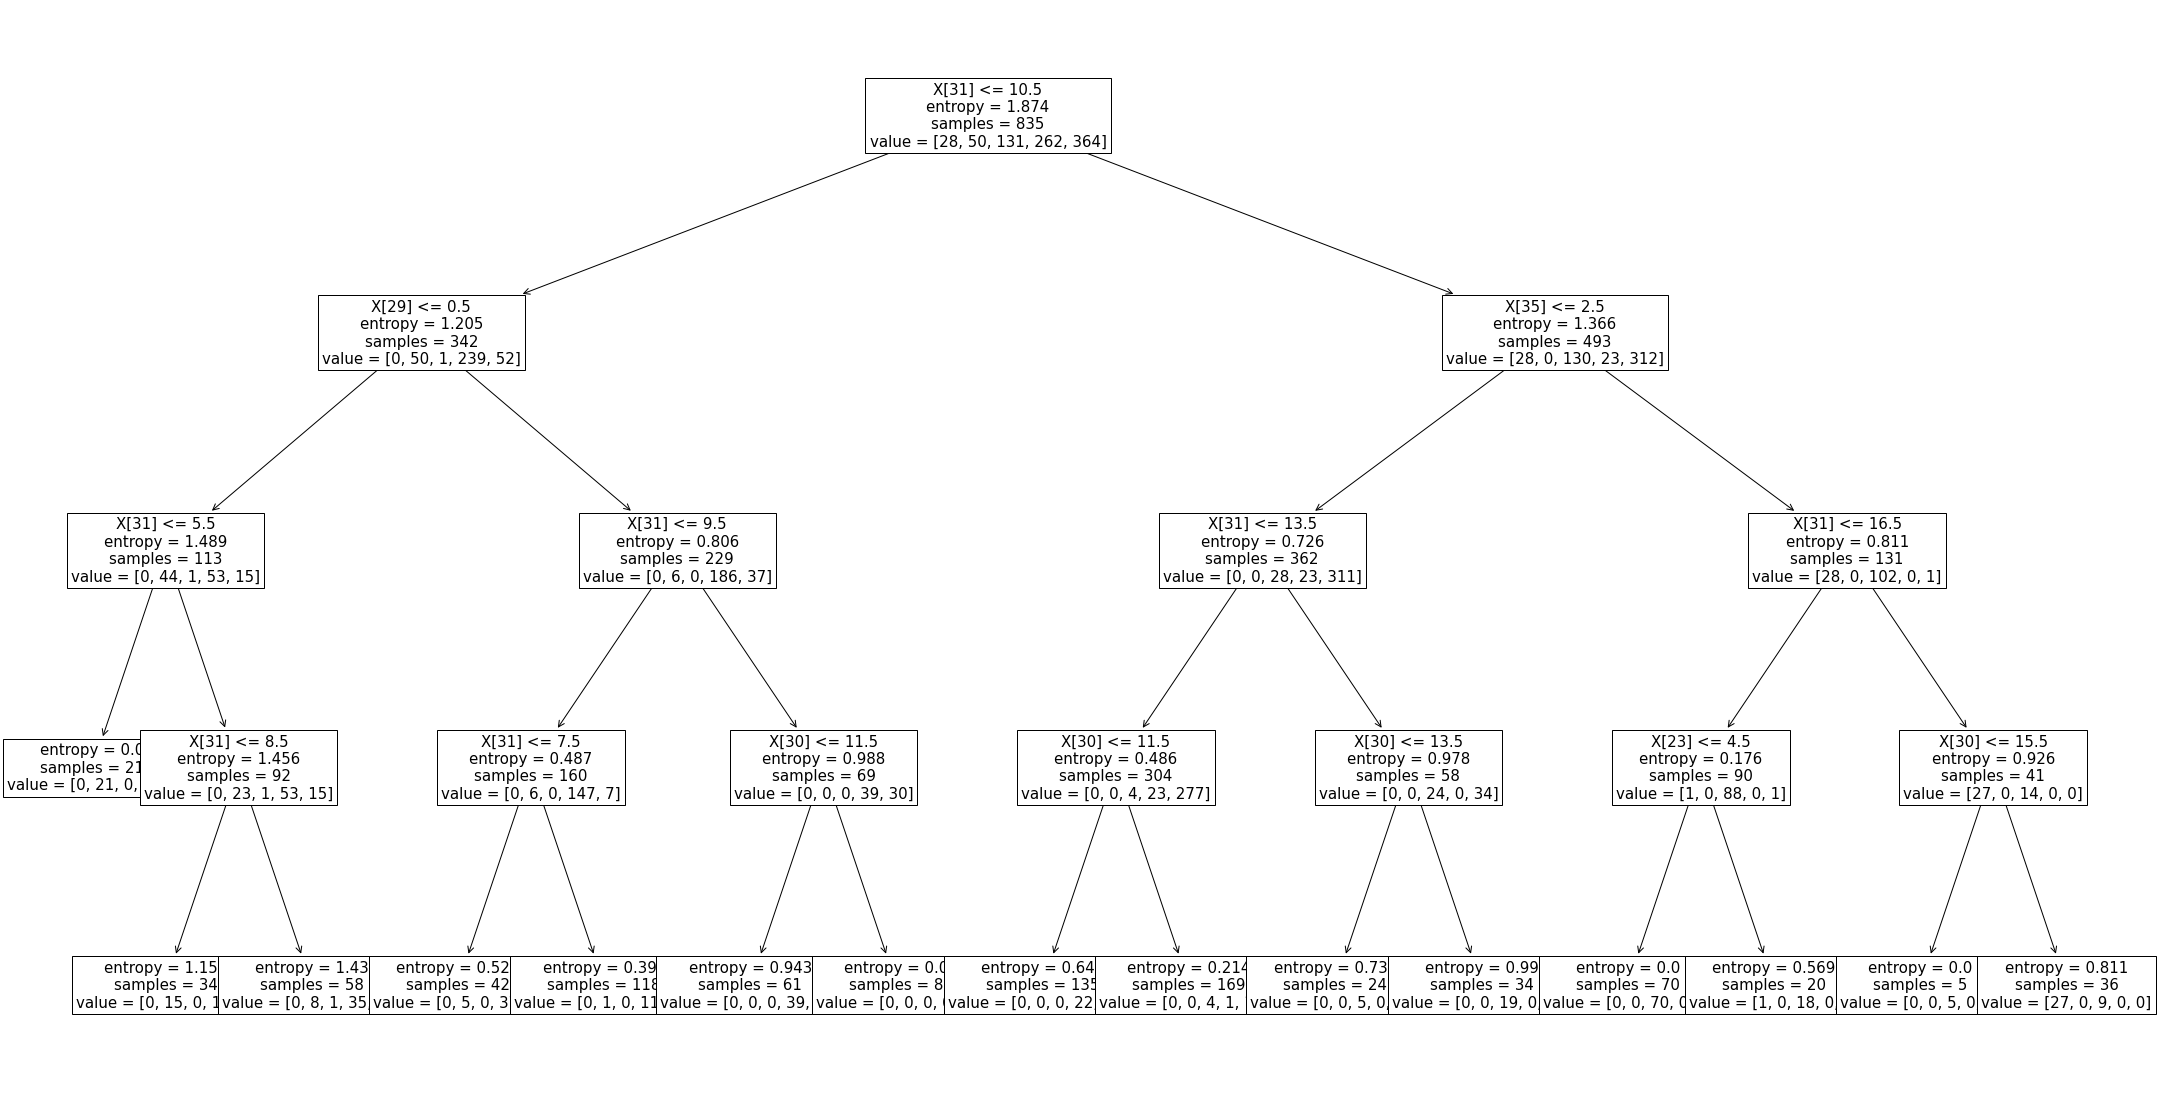

In [ ]:
plt.figure(figsize=(38,20))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train),fontsize=15) 

In [ ]:
y.unique()

array(['Poor', 'Good', 'Satisfactory', 'Excellent', 'Failure'],
      dtype=object)

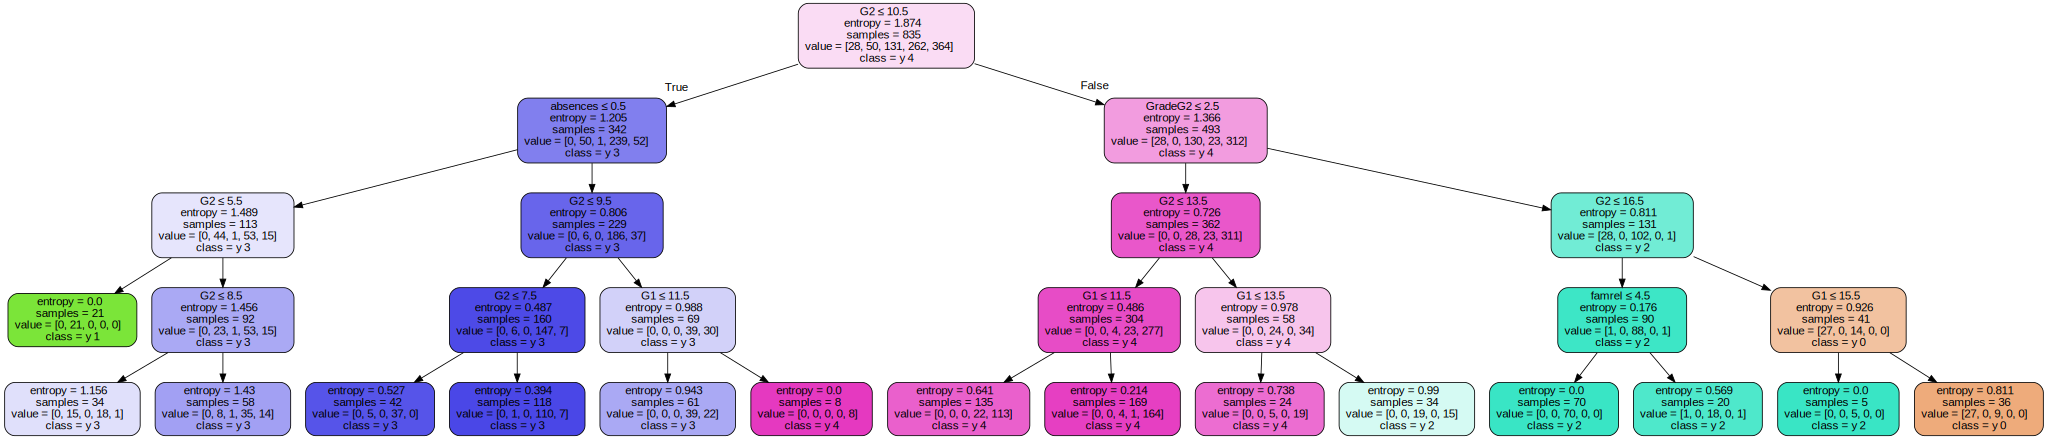

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=True,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

# Confusion matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[ 7  0  0  0  0]
 [ 0  7  0  6  0]
 [ 5  0 29  0  4]
 [ 0  0  0 53  5]
 [ 0  0  6  9 78]]


# Classification Report 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

   Excellent       0.58      1.00      0.74         7
     Failure       1.00      0.54      0.70        13
        Good       0.83      0.76      0.79        38
        Poor       0.78      0.91      0.84        58
Satisfactory       0.90      0.84      0.87        93

    accuracy                           0.83       209
   macro avg       0.82      0.81      0.79       209
weighted avg       0.85      0.83      0.83       209



# make new predictions

In [ ]:
clf_en.predict([[2,1,19,2,0,2,1,1,3,2,3,3,3,1,1,1,1,1,1,1,1,2,1,4,4,4,3,3,5,4,8,9,2,2,1,1]])

array(['Poor'], dtype=object)

In [ ]:
clf_en.predict([[1,1,18,1,0,2,4,2,2,2,1,2,1,2,0,1,1,1,2,1,1,2,2,5,4,5,1,3,5,4,10,12,2,2,1,2]])

array(['Satisfactory'], dtype=object)

In [ ]:
clf_en.predict([[1,1,18,1,1,1,4,4,1,4,1,1,1,2,0,1,1,1,2,1,1,2,1,5,4,3,1,1,2,0,17,17,2,2,3,3]])

array(['Excellent'], dtype=object)

In [ ]:
clf_en.predict([[1,2,16,1,1,2,3,3,3,2,1,1,2,2,0,1,1,1,2,1,1,2,1,4,4,5,1,1,4,0,14,14,2,2,2,2]])

array(['Good'], dtype=object)

In [ ]:
clf_en.predict([[1,2,19,2,0,2,3,4,1,4,2,1,1,1,0,1,2,1,2,2,1,2,1,3,5,5,2,5,4,5,12,15,2,1,1,1]])

array(['Satisfactory'], dtype=object)

In [ ]:
clf_en.predict([[2,2,16,1,0,2,3,1,3,2,4,1,1,1,0,1,2,1,2,1,1,2,1,3,1,3,1,3,1,0,8,6,2,2,1,1]])

array(['Poor'], dtype=object)

In [ ]:
clf_en.predict([[2,2,16,1,0,2,3,1,3,2,4,1,1,1,0,1,2,1,2,1,1,2,1,3,1,3,1,3,1,0,8,6,2,2,1,1]])

array(['Poor'], dtype=object)

In [ ]:
clf_en.predict([[4,2,15,1,0,2,3,1,3,2,4,1,1,1,0,1,2,1,2,1,1,2,1,3,1,3,1,3,1,0,7,6,2,1,1,1]])

array(['Poor'], dtype=object)

In [ ]:
x1 = encoder.transform([['GP','F',18,'U',0,'A',4,4,'at_home','teacher','course','mother',2,2,0,'yes','no','no','no','yes','yes','no','no',4,3,4,1,1,3,6,5,6,'maths','Always regular','Failure','Poor']])

KeyError: ignored

In [ ]:
clf_en.predict(x1)